# Neural Network 

<b> Adam Optimizer</b>
Adam is an adaptive learning rate optimization algorithm that's been designed specifically for training deep neural networks. The algorithms leverages the power of adaptive learning rates methods to find individual learning rates for each parameter. 
<br>
Adam is an optimization solver for the Neural Network algorithm that is computationally efficient, requires little memory, and is well suited for problems that are large in terms of data or parameters or both. Adam is a popular extension to stochastic gradient descent

<b>ReLU </b>
The rectified linear activation function or ReLU for short is a piecewise linear function that will output the input directly if it is positive, otherwise, it will output zero. It has become the default activation function for many types of neural networks because a model that uses it is easier to train and often achieves better performance.<br>
<br>
In order to use stochastic gradient descent with backpropagation of errors to train deep neural networks, an activation function is needed that looks and acts like a linear function, but is, in fact, a nonlinear function allowing complex relationships in the data to be learned.The function must also provide more sensitivity to the activation sum input and avoid easy saturation.The solution had been bouncing around in the field for some time, although was not highlighted until papers in 2009 and 2011 shone a light on it.

The solution is to use the rectified linear activation function, or <b>ReL</b> for short.

In [19]:
from IPython.display import Image

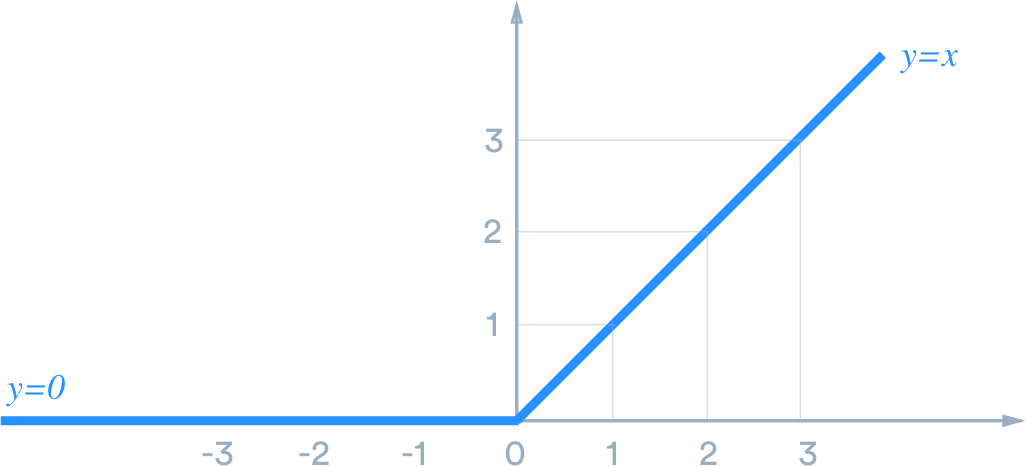

In [20]:
Image('relu.png')

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [3]:
mnist = tf.keras.datasets.mnist

In [4]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

11493376/11490434 [==============================] - 41s 4us/step


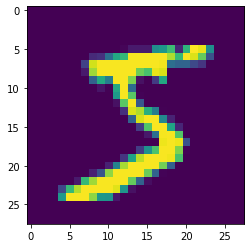

In [5]:
plt.imshow(x_train[0])

In [6]:
print(x_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

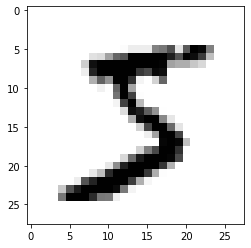

In [7]:
plt.imshow(x_train[0],cmap = plt.cm.binary)

In [8]:
x_train = tf.keras.utils.normalize(x_train,axis=1)
x_test = tf.keras.utils.normalize(x_test,axis=1)

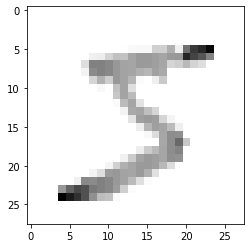

In [9]:
plt.imshow(x_train[0],cmap = plt.cm.binary)

In [10]:
print(x_train[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [11]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128,activation =tf.nn.relu))
model.add(tf.keras.layers.Dense(128,activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(10,activation=tf.nn.softmax))

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
model.fit(x_train,y_train,epochs=3)

Epoch 1/3
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2656 - accuracy: 0.9218
Epoch 2/3
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1081 - accuracy: 0.9668
Epoch 3/3
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0740 - accuracy: 0.9769


In [12]:
val_loss,val_acc = model.evaluate(x_test,y_test)
print(val_loss)
print(val_acc)

313/313 [==============================] - 0s 1ms/step - loss: 0.0905 - accuracy: 0.9719
0.09050033241510391
0.9718999862670898


In [13]:
model.save('epic_num_reader.model')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: epic_num_reader.model\assets


In [14]:
new_model = tf.keras.models.load_model('epic_num_reader.model')

In [15]:
predictions = new_model.predict([x_test])

In [16]:
print(predictions)

[[2.2326907e-09 1.5459801e-08 1.0909951e-06 ... 9.9998176e-01
  3.7928096e-09 3.7696157e-07]
 [4.5553845e-11 4.6688176e-04 9.9951947e-01 ... 2.9425001e-08
  9.0280317e-08 8.1947144e-14]
 [6.2483615e-08 9.9983811e-01 6.5077170e-06 ... 2.5356767e-05
  1.1494551e-04 3.7707534e-07]
 ...
 [8.0795280e-11 2.9500677e-07 1.0907010e-09 ... 1.8514353e-05
  1.2328290e-07 2.7969800e-04]
 [1.6142142e-06 5.1945995e-07 4.7911172e-08 ... 9.4025631e-07
  2.6238518e-04 4.8194565e-08]
 [3.1096025e-07 4.1014769e-06 2.0238749e-06 ... 1.6551758e-09
  9.8191421e-08 2.6359348e-08]]


In [17]:
import numpy as np
print(np.argmax(predictions[0]))

7


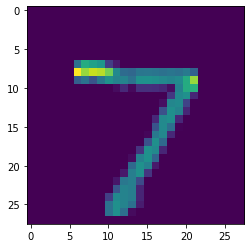

In [18]:
plt.imshow(x_test[0])